## 2D error heatmap generator
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cathaypacific8747/physics-ia-tools/blob/main/main.ipynb)

#### How to use
1. Run the first cell to initialise all packages and code.
2. In the second cell, edit the variables to your desired values and run it.
3. Download `graph.png` in the left "Files" panel or Right Click > Save Image under the output of the second cell.

#### Help
Feel free to contact [me](https://github.com/cathaypacific8747) via Discord (`cathayexpress#2424`) or email (`cathaypacific8747@gmail.com`)!
View the GitHub project [here](https://github.com/cathaypacific8747/physics-ia-tools).

In [10]:
%%capture
%pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from IPython.display import display
import os
from math import *

# use latin modern math font
if not os.path.isfile('latinmodern-math.otf'):
    !wget https://github.com/cathaypacific8747/physics-ia-tools/raw/main/latinmodern-math.otf
matplotlib.font_manager.fontManager.addfont('latinmodern-math.otf')
plt.rcParams["font.family"] = "Latin Modern Math"
plt.rcParams["mathtext.fontset"] = "cm"
plt.ioff()

class Graph:
    def __init__(self, xRange: tuple[float, float], yRange: tuple[float, float], xDivisions: int, yDivisions: int, zFunc):
        self.x = np.linspace(xRange[0], xRange[1], xDivisions)
        self.y = np.linspace(yRange[0], yRange[1], yDivisions)
        self.xg, self.yg = np.meshgrid(self.x, self.y)
        self.zg = np.array([[min(zFunc(self.x[xi], self.y[yi]), 1) for yi in range(len(self.y))] for xi in range(len(self.x))])

    def generate(self, xLabel:str, yLabel:str, colourBarLabel: str, contourLineLevels: list[float]) -> Image:
        contour = plt.contourf(self.x, self.y, self.zg, 500, cmap='turbo')
        if contourLineLevels:
            contourLine = plt.contour(self.x, self.y, self.zg, levels=contourLineLevels, colors='white', linewidths=0.4)
            plt.clabel(contourLine, inline=True, fontsize=6)

        cbar = plt.colorbar(contour)
        cbar.set_label(colourBarLabel)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
        plt.savefig('graph.png', dpi=600)
        plt.clf()
        plt.close()
        return Image.open('graph.png')

/tmp/ipykernel_13228/1108040967.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  return 0.0001/0.1000 + 2*0.01/x + 0.0005/y


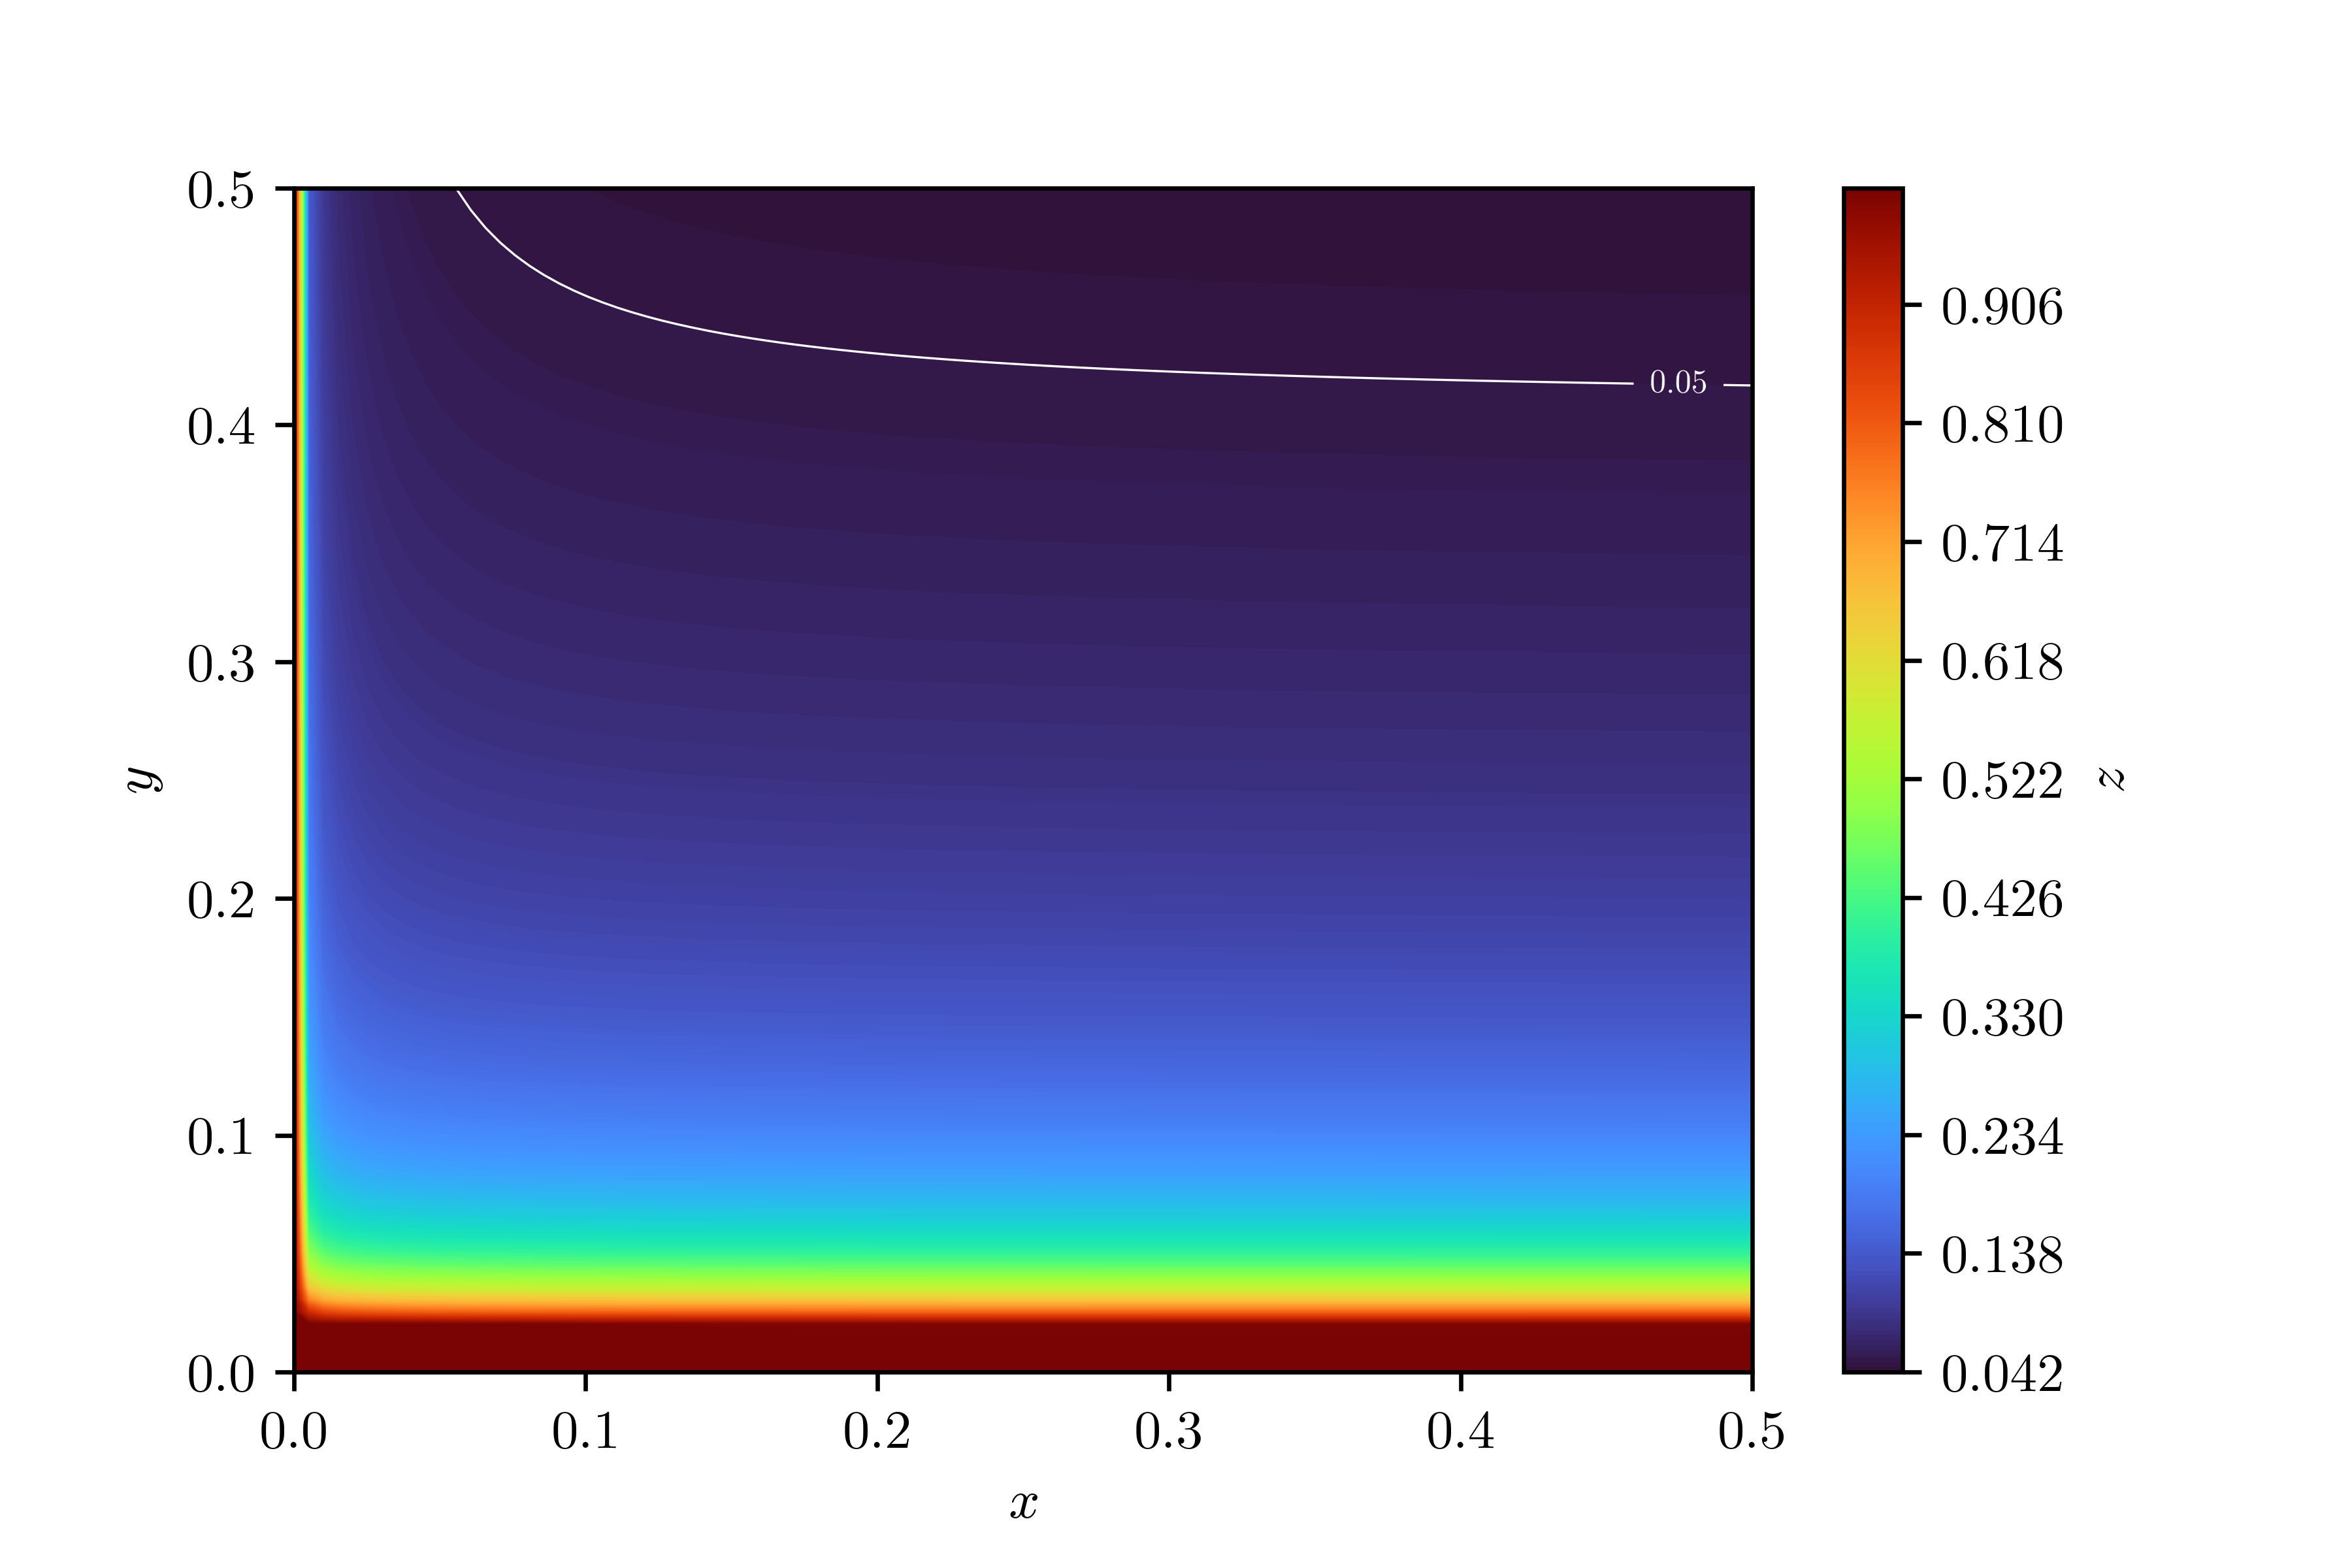

In [28]:
xRange = (0, 0.5)
yRange = (0, 0.5)
xDivisions = 100
yDivisions = 100
xLabel = '$x$'
yLabel = '$y$'
colourBarLabel = '$z$'
contourLineLevels = [0.05] # leave empty to disable

def z(x, y):
    return 0.0001/0.1000 + 2*0.01/x + 0.0005/y

graph = Graph(xRange, yRange, xDivisions, yDivisions, z)
display(graph.generate(xLabel, yLabel, colourBarLabel, contourLineLevels))